In [8]:
import numpy as np
import matplotlib.pyplot as plt

def plot_distribution(X, axes=None):
    """给定随机变量，绘制PDF,PMF,CDF"""
    if axes is None:
        fig, axes = plt.subplots(1, 2, figsize=(10, 3))
    x_min, x_max = X.interval(0.99)
    x = np.linspace(x_min, x_max, 1000)
    if hasattr(X.dist, 'pdf'): # 判断有没有pdf，即是不是连续分布
        axes[0].plot(x, X.pdf(x), label="PDF")
        axes[0].fill_between(x, X.pdf(x), alpha=0.5)
    else: # 离散分布
        x_int = np.unique(x.astype(int))
        axes[0].bar(x_int, X.pmf(x_int), label="PMF")
    
    axes[1].plot(x, X.cdf(x), label="CDF")
    for ax in axes:
        ax.legend()
    
    return axes

>* ***伯努利分布***（*bernoulli distribution*）：
>$$\begin{aligned}&P\left(\mathrm{x}=1\right)=\phi\\ &P\left(\mathrm{\mathrm{x}=0}\right)=1-\phi\\ &P\left({\mathrm{x}=x}\right)=\phi^x\left(1-\phi\right)^{1-x}\end{aligned}$$

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

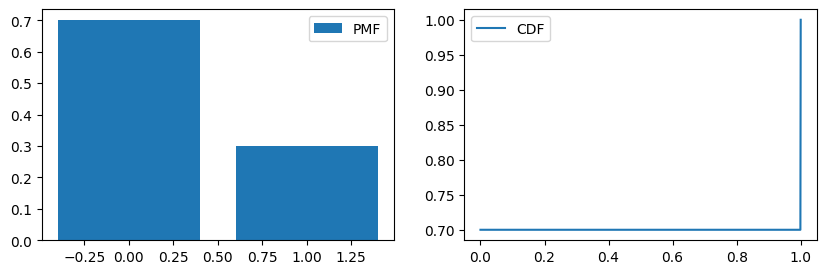

In [9]:
from scipy.stats import bernoulli

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
p = 0.3

X = bernoulli(p)

plot_distribution(X, axes=axes)

>* ***范畴分布/分类分布***（*multinoulli distribution*）：在具有$k$个不同值的单个离散型随机变量上的分布：
>$$p(\mathrm x=x)=\prod_i\phi_i^{x_i}$$

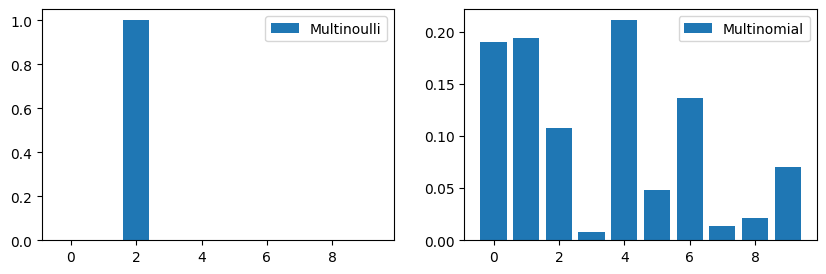

In [25]:
def k_possibilities(k):
    """随机产生一组k维概率向量， 和为1"""
    res = np.random.rand(k)
    _sum = sum(res)
    for i, x in enumerate(res):
        res[i] = x / _sum
    
    return res

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# 一次实验，范畴分布
k, n_samples = 10, 1
samples = np.random.multinomial(n_samples, k_possibilities(k)) # 各维度成功的次数
axes[0].bar(range(len(samples)), samples/n_samples, label="Multinoulli")

# n次实验，多项分布
n_samples = 1000
samples = np.random.multinomial(n_samples, k_possibilities(k))
axes[1].bar(range(len(samples)), samples/n_samples, label="Multinomial")

for ax in axes:
    ax.legend()

>* ***高斯分布/正态分布***（*Gaussian distribution/normal distribution*）：
>$$N(x;\mu,\sigma^2)=\sqrt{\dfrac{1}{2\pi\sigma^2}}\exp\left(-\dfrac{1}{2\sigma^2}(x-\mu)^2\right)$$

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

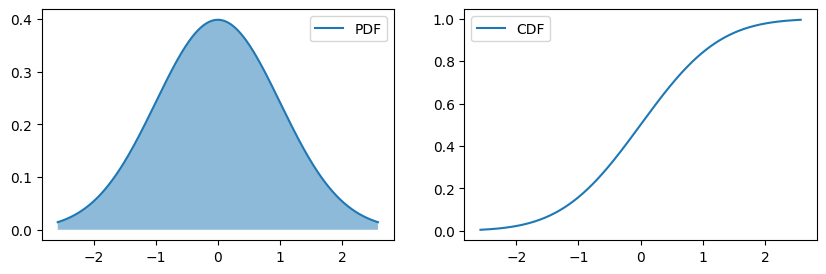

In [28]:
from scipy.stats import norm

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
mu, sigma = 0, 1
X = norm(mu, sigma)
plot_distribution(X, axes=axes)

>* ***多元正态分布***（*multivariate normal distribution*）：
>$$N(x;\mu,\Sigma)=\sqrt{\dfrac{1}{(2\pi)^n\det(\Sigma)}}\exp\left(-\dfrac{1}{2}(x-\mu)^{\top}\Sigma^{-1}(x-\mu)\right)$$

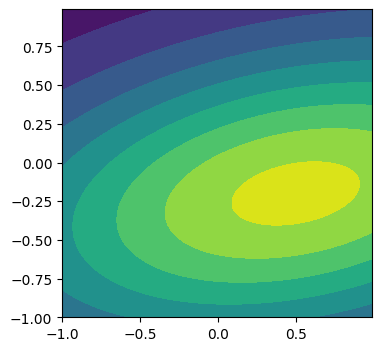

In [30]:
from scipy.stats import multivariate_normal

x, y = np.mgrid[-1:1:.01, -1:1:.01]
pos = np.dstack((x, y))
fig = plt.figure(figsize=(4, 4))
axes = fig.add_subplot(1, 1, 1)
mu = [0.5, -0.2]
sigma = [[2.0, 0.3], [0.3, 0.5]]
X = multivariate_normal(mu, sigma)
axes.contourf(x, y, X.pdf(pos))


>* ***指数分布***（*exponential distribution*）：
>$$p(x;\lambda)=\lambda_{x\geq0}\exp(-\lambda x)$$
>用于在$x=0$处获得最高概率的分布  
>$\lambda >0$被称为率参数（*rate parameter*）


array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

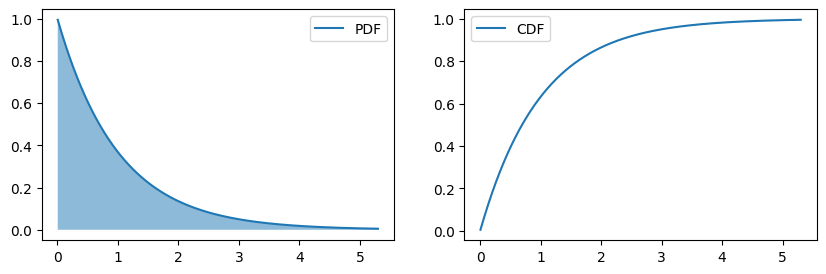

In [31]:
from scipy.stats import expon
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# 定义 scale = 1 / lambda
X = expon(scale = 1)
plot_distribution(X, axes=axes)

>* ***拉普拉斯分布***（*Laplace distribution*）：
>$$\operatorname{Laplace}(x;\mu,\gamma)=\dfrac{1}{2\gamma}\exp\left(-\dfrac{|x-\mu|}{\gamma}\right)$$
>在一个点获得比较高的概率的分布

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

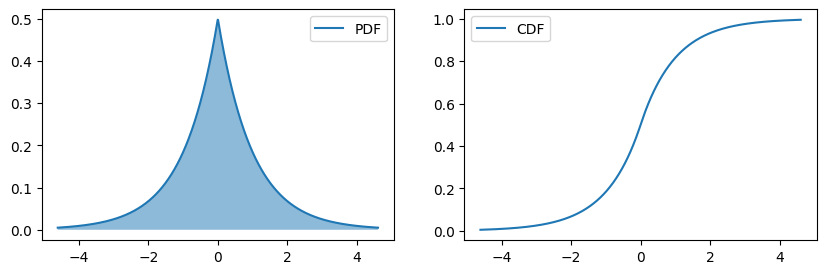

In [35]:
from scipy.stats import laplace

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
mu, gamma= 0, 1
X = laplace(loc=mu, scale=gamma)
plot_distribution(X, axes=axes)